In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
raw_data = pd.read_csv('IndexE8.csv')
df_comp = raw_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.spx
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp)*0.8)
train_df = df_comp.iloc[:size]
test_df = df_comp.iloc[size:]

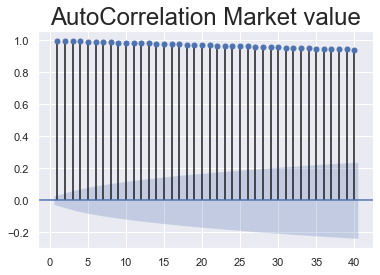

In [4]:
sgt.plot_acf(train_df.market_value, zero=False, lags=40)
plt.title('AutoCorrelation Market value', size=24)
plt.show()

### Graph Interpretation (acf market value)

All 40 lagged coefficients are significant and slowly declining. Furthermore, all of them are positive and between 0.9 and 1 which indicates that the effects barely deteriotes over the time. This shows that two time series are similar in the way the behave and the way past value affect present ones

### Model:

Generally we prefer parsimonious model since they since they make more reasonable predictors and prevent us from overfitting the data. The more lags we include, the better our model will fit the dataset we feed it.

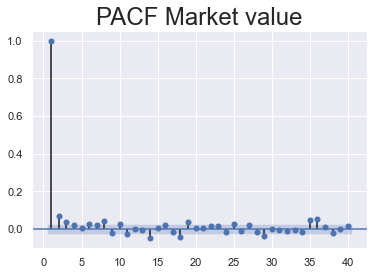

In [5]:
sgt.plot_pacf(train_df.market_value, zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title('PACF Market value', size=24)
plt.show()

### Graph Interpretation (pacf market value):

Coeffients of different size, coeffients that are negative as well as coeffients which are not significant. The coeffients from 25 onwords are not significant so we can ignore them. Since the values of coeffients extremly close to zero, their impact on model is minimal, so they are not relevant to us. So our model should include less than 25 lag.

### The AR Model - with lag one

In [6]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [7]:
model_ar = ARMA(train_df.market_value , order = (1,0))

In [8]:
results_ar = model_ar.fit()

In [9]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.395
Method:                       css-mle   S.D. of innovations             13.238
Date:                Wed, 14 Oct 2020   AIC                          40200.790
Time:                        14:02:51   BIC                          40220.354
Sample:                    01-07-1994   HQIC                         40207.645
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1087.7306    225.513      4.823      0.000     645.734    1529.727
ar.L1.market_value     0.9993      0.001   1892.103      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           +0.0000j            1.0007            0.0000
-----------------------------------------------------------------------------
"""

### The AR models with higher lag values

In [10]:
model_ar2 = ARMA(train_df.market_value , order = (2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.280
Method:                       css-mle   S.D. of innovations             13.206
Date:                Wed, 14 Oct 2020   AIC                          40178.560
Time:                        14:02:54   BIC                          40204.645
Sample:                    01-07-1994   HQIC                         40187.700
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1061.9324    248.156      4.279      0.000     575.556    1548.309
ar.L1.market_value     0.9300      0.014     68.003      0.000       0.903       0.957
ar.L2.market_value     0.0694      0.014      5.072      0.000       0.043       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.4024           +0.0000j           14.4024            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
model_ar3 = ARMA(train_df.market_value , order = (3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Wed, 14 Oct 2020   AIC                          40174.694
Time:                        14:02:55   BIC                          40207.301
Sample:                    01-07-1994   HQIC                         40186.120
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1057.9774    258.906      4.086      0.000     550.531    1565.424
ar.L1.market_value     0.9277      0.014     68.253      0.000       0.901       0.954
ar.L2.market_value     0.0376      0.019      1.988      0.047       0.001       0.075
ar.L3.market_value     0.0342      0.014      2.423      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0505           -5.3050j            5.4080           -0.2811
AR.3           -1.0505           +5.3050j            5.4080            0.2811
-----------------------------------------------------------------------------
"""

In [12]:
model_ar4 = ARMA(train_df.market_value , order = (4,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Wed, 14 Oct 2020   AIC                          40174.511
Time:                        14:02:56   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1051.6719    266.465      3.947      0.000     529.411    1573.933
ar.L1.market_value     0.9270      0.014     68.606      0.000       0.900       0.953
ar.L2.market_value     0.0368      0.019      1.953      0.051      -0.000       0.074
ar.L3.market_value     0.0149      0.019      0.772      0.440      -0.023       0.053
ar.L4.market_value     0.0208      0.014      1.477      0.140      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9312           -0.0000j            3.9312           -0.5000
AR.3            1.1090           -3.3123j            3.4930           -0.1986
AR.4            1.1090           +3.3123j            3.4930            0.1986
-----------------------------------------------------------------------------
"""

### LLR Test

In [13]:
# funtion to test LLR


def LLR_test(mod_1,mod_2,DF=1):
    
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    P = chi2.sf(LR,DF).round(3)
    
    return P
    

In [14]:
LLR_test(model_ar2,model_ar3)

0.015

In [15]:
LLR_test(model_ar3,model_ar4)

0.14

In [16]:
model_ar4 = ARMA(train_df.market_value , order = (4,0))
results_ar4 = model_ar4.fit()
print(results_ar4.summary())
print(f"LLR test p-value {LLR_test(model_ar3,model_ar4)}")

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Wed, 14 Oct 2020   AIC                          40174.511
Time:                        14:03:08   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1051.6719    266.465      3.947      0.000     529.411    1573.933
ar.L1.market_value     0.9270      0.014     68.606      0.000       0.900       0.953
ar.L2.market_value  

In [17]:
model_ar5 = ARMA(train_df.market_value , order = (5,0))
results_ar5 = model_ar5.fit()
print(results_ar5.summary())
print(f"LLR test p-value {LLR_test(model_ar4,model_ar5)}")

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -20081.499
Method:                       css-mle   S.D. of innovations             13.195
Date:                Wed, 14 Oct 2020   AIC                          40176.997
Time:                        14:03:12   BIC                          40222.647
Sample:                    01-07-1994   HQIC                         40192.994
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1311.6959        nan        nan        nan         nan         nan
ar.L1.market_value     0.9269      0.011     82.264      0.000       0.905       0.949
ar.L2.market_value  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


### The DF-Test

In [18]:
sts.adfuller(train_df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

Since from the test data is non-stationary(p values is greater than 0.05 ) we cannot rely on AR test for accurate forecast. In such cases we can convert data to stationary. One approach is to use returns instead of prices. (Return -> the % change between the values for two consecutive period) (psotive returns -> increase in price, and negative return decrease in price)

In [19]:
train_df['return1'] = train_df.market_value.pct_change(1).mul(100)

<ipython-input-19-45c5a5f434a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['return1'] = train_df.market_value.pct_change(1).mul(100)


In [20]:
train_df['return1']

date
1994-01-07         NaN
1994-01-10    1.142796
1994-01-11   -0.239864
1994-01-12    0.008437
1994-01-13   -0.358521
                ...   
2013-04-01   -0.446858
2013-04-02    0.517126
2013-04-03   -1.054943
2013-04-04    0.404994
2013-04-05   -0.429518
Freq: B, Name: return1, Length: 5021, dtype: float64

In [21]:
train_df = train_df.iloc[1:]

In [22]:
train_df.return1

date
1994-01-10    1.142796
1994-01-11   -0.239864
1994-01-12    0.008437
1994-01-13   -0.358521
1994-01-14    0.516435
                ...   
2013-04-01   -0.446858
2013-04-02    0.517126
2013-04-03   -1.054943
2013-04-04    0.404994
2013-04-05   -0.429518
Freq: B, Name: return1, Length: 5020, dtype: float64

In [23]:
sts.adfuller(train_df.return1)

(-17.0344571909812,
 8.280537020316706e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345134)

### ACF and PACF for Returns

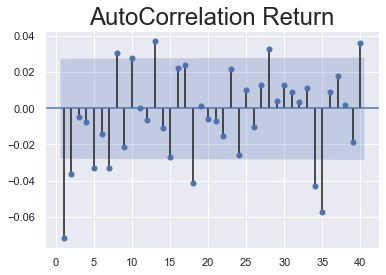

In [24]:
sgt.plot_acf(train_df.return1, zero=False, lags=40)
plt.title('AutoCorrelation Return', size=24)
plt.show()

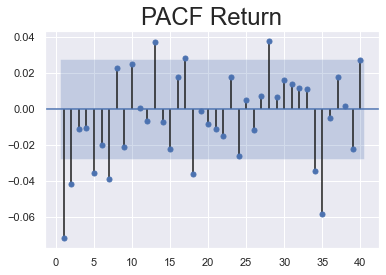

In [25]:
sgt.plot_pacf(train_df.return1, zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title('PACF Return', size=24)
plt.show()

### The AR model 